# Diagnosis Prediction in Medical Imaging: A Comparative Analysis of Classifiers

In [1]:
# Importing Libaries

In [48]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from skimage import io, transform
from sklearn import preprocessing
import numpy as np
import joblib
import cv2
from sklearn.decomposition import PCA

In [49]:
# uploading the Dataset and Model Files

In [50]:
path = r"Data"
model_folder = "model"
categories = [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
categories


['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

In [51]:
# Image Preprocessing, saving and loading the Image files

In [52]:
X_file = os.path.join(model_folder, "X.txt.npy")
Y_file = os.path.join(model_folder, "Y.txt.npy")
if os.path.exists(X_file) and os.path.exists(Y_file):
    X = np.load(X_file)
    Y = np.load(Y_file)
    print("X and Y arrays loaded successfully.")
else:
    X = [] # input array
    Y = [] # output array
    for root, dirs, directory in os.walk(path):
        for j in range(len(directory)):
            name = os.path.basename(root)
            print(f'Loading category: {dirs}')
            print(name+" "+root+"/"+directory[j])
            if 'Thumbs.db' not in directory[j]:
                img_array = cv2.imread(root+"/"+directory[j])
                img_resized = resize(img_array, (64, 64, 3))
                # Append the input image array to X
                X.append(img_resized.flatten())
                # Append the index of the category in categories list to Y
                Y.append(categories.index(name))
    X = np.array(X)
    Y = np.array(Y)
    np.save(X_file, X)
    np.save(Y_file, Y)

X and Y arrays loaded successfully.


In [53]:
# Splitting the data into training and testing sets

In [54]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.980197,0.747308,0.803952,0.987315,0.744410,0.799891,0.987578,0.743794,0.798809,0.988174
1,0.213773,0.286237,0.431337,0.195891,0.268354,0.413455,0.179815,0.252279,0.397379,0.172188,...,0.728529,0.494334,0.545811,0.694665,0.434969,0.486446,0.635300,0.404031,0.455508,0.604362
2,0.929412,0.992157,0.988235,0.929412,0.992157,0.988235,0.929412,0.992157,0.988235,0.929412,...,0.825390,0.454549,0.398333,0.760191,0.419205,0.351956,0.715025,0.499841,0.426894,0.801726
3,0.295210,0.291286,0.534758,0.278634,0.273544,0.525616,0.291406,0.280157,0.549260,0.272643,...,0.991695,0.936239,0.956012,0.991637,0.936239,0.956012,0.991637,0.936239,0.956012,0.991637
4,0.198705,0.238080,0.331869,0.194272,0.233646,0.327435,0.194879,0.234253,0.328042,0.194872,...,0.743875,0.359682,0.482349,0.743747,0.359410,0.482074,0.743475,0.359404,0.482068,0.743469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,0.823529,0.811765,0.780392,0.823529,0.811765,0.780392,0.823529,0.811765,0.780392,0.823459,...,0.854896,0.803928,0.811771,0.854908,0.805735,0.813578,0.856715,0.811080,0.818923,0.862060
3911,0.732583,0.783819,0.998847,0.734722,0.793532,0.987083,0.711077,0.764058,0.975687,0.679673,...,0.988082,0.695065,0.736359,0.966743,0.714704,0.757835,0.982091,0.712550,0.755687,0.982973
3912,0.709140,0.719528,0.818947,0.723054,0.720522,0.816846,0.699481,0.692749,0.780955,0.675319,...,0.691734,0.663982,0.671821,0.733591,0.720797,0.720979,0.777986,0.762864,0.762864,0.813345
3913,0.682574,0.686338,0.702339,0.682547,0.682643,0.706629,0.681233,0.677923,0.711764,0.681831,...,0.811096,0.849381,0.794479,0.810166,0.847109,0.792207,0.807893,0.847059,0.792157,0.807843


In [55]:
Y = pd.DataFrame(Y)
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
3910,6
3911,6
3912,6
3913,6


In [56]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.35,random_state=44)

In [57]:
labels=categories

In [58]:
#defining global variables to store accuracy and other metrics


In [59]:
precision = []
recall = []
fscore = []
accuracy = []

In [60]:
#function to calculate various metrics such as accuracy, precision etc

In [61]:
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# Logistic Regression


c:\users\vinod\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Logistic Regression model trained and model weights saved.
Logistic Regression Accuracy    : 56.16338439095551
Logistic Regression Precision   : 56.03019712720062
Logistic Regression Recall      : 55.69730672254217
Logistic Regression FSCORE      : 55.69105843350213

 Logistic Regression classification report
               precision    recall  f1-score   support

         CaS       0.45      0.46      0.45       189
         CoS       0.72      0.62      0.67       226
         Gum       0.54      0.60      0.57       154
          MC       0.51      0.59      0.55       222
          OC       0.48      0.52      0.50       124
         OLP       0.63      0.54      0.58       297
          OT       0.57      0.60      0.58       159

    accuracy                           0.56      1371
   macro avg       0.56      0.56      0.56      1371
weighted avg       0.57      0.56      0.56      1371



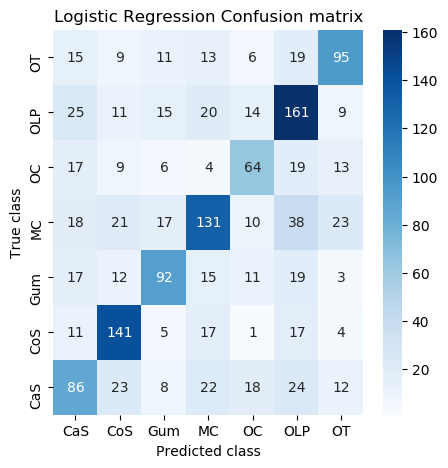

In [62]:
model_file1 = os.path.join(model_folder, 'LR_model.pkl')
if os.path.exists(model_file1):
    # Load the trained model from the file
    clf = joblib.load(model_file1)
    print("Logistic Regression model trained and model weights saved.")
    predict = clf.predict(x_test)
    calculateMetrics("Logistic Regression", predict, y_test)
else:
    # Train the model (assuming X_train and y_train are defined)
    clf =LogisticRegression()
    clf.fit(x_train, y_train)
    # Save the trained model to a file
    joblib.dump(clf, model_file1)
    print("Logistic Regression model trained and model weights saved..")
    predict = clf.predict(x_test)
    calculateMetrics("Logistic Regression", predict, y_test)
    


# Extra Trees Classifier

Extra Trees Classifier Accuracy    : 88.98614150255288
Extra Trees Classifier Precision   : 90.47081773478786
Extra Trees Classifier Recall      : 88.12684853794799
Extra Trees Classifier FSCORE      : 89.03164425709181

 Extra Trees Classifier classification report
               precision    recall  f1-score   support

         CaS       0.86      0.86      0.86       194
         CoS       0.93      0.88      0.90       209
         Gum       0.88      0.98      0.93       152
          MC       0.92      0.86      0.89       275
          OC       0.78      0.97      0.87       106
         OLP       0.93      0.84      0.88       281
          OT       0.87      0.95      0.91       154

    accuracy                           0.89      1371
   macro avg       0.88      0.90      0.89      1371
weighted avg       0.89      0.89      0.89      1371



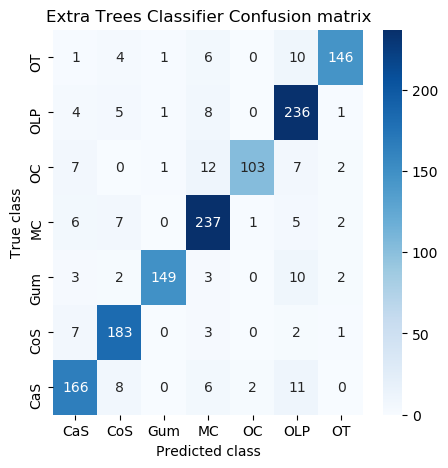

In [63]:
Model_file1 = os.path.join(model_folder, "Etc_Model.pkl")
if os.path.exists(Model_file1):
    etc_classifier = joblib.load(Model_file1)
    predict = etc_classifier.predict(x_test)
    calculateMetrics("Extra Trees Classifier", predict, y_test)
else:
    
    etc_classifier = ExtraTreesClassifier()
    etc_classifier.fit(x_train, y_train)
    joblib.dump(etc_classifier, Model_file1)  
    predict = etc_classifier.predict(x_test)
    print("Extra Trees Classifier model trained and model weights saved.")
    calculateMetrics("Extra Trees Classifier", predict, y_test)
    

# Tabular form of Performance Metrics

In [64]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["Logistic Regression","Extra Trees Classifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

,Algorithm Name,Precison,Recall,FScore,Accuracy
0,Logistic Regression,56.030197,55.697307,55.691058,56.163384
1,Extra Trees Classifier,90.470818,88.126849,89.031644,88.986142


In [65]:
# Model Prediction

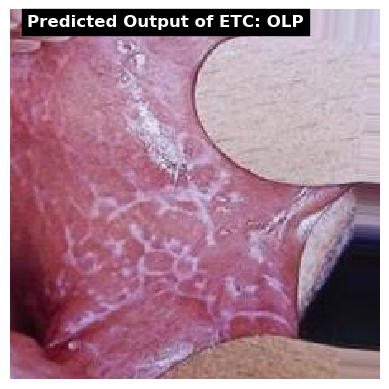

In [66]:
path=r"Data\OLP\aug_0_6706.jpg"
img=imread(path)
img_resize=resize(img,(64,64,3))
img_preprocessed=[img_resize.flatten()]
output_number=etc_classifier.predict(img_preprocessed)[0]
output_name=categories[output_number]

plt.imshow(img)
plt.text(10, 10, f'Predicted Output of ETC: {output_name}', color='white', fontsize=12, weight='bold', backgroundcolor='black')
plt.axis('off')
plt.show()